### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
import statistics

### import data

In [2]:
data=pd.read_excel('customer_retention_dataset.xlsx')
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


### Check column names and rename them

In [3]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [4]:
columns=['gender','age','city','pinCode','shopping_since','shopping_frequency_1year','internet_type','device',
           'screen_size','OS', 'browser','1_channel','Access','time_spent','prefered_payment_mode',
           'cancel_shopping','cancel_reason','content_readability','similar_product',
           'seller_info','product_info_clarity','navigation_ease','web_speed','UI',
           'UI_payment_mode','trust_process','customer_support','privacy_garauntee',
           'Channel_Diversity','benefit','satisfaction','convenient','Return/Replacement','loyalty_program',
         'info_satisfaction','UI_Satisfaction','net_benefit','trust','product_category','relevant_info',
         'Savings','patronizing','experience','Status','gratification','role','Worthy','platform_Used',
         'convinient_accessibility','Appealing_UI','product_diversity','product_info','performance_platform','reliable_UI',
         'navigation','payment_mode_availability','speed_delivery','customer_privacy','financial_security','trust_worthiness',
        'multi_channel','slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
         'longer_delivery_period','frequent_UI_change','frequent_page_disruption','UI_efficiency','platform_recommend']
data.columns = columns
pd.set_option('max_columns', None)
data.head(1)

,gender,age,city,pinCode,shopping_since,shopping_frequency_1year,internet_type,device,screen_size,OS,browser,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


### drop columns which do not fit relevant to analyze retention or activation rate: screen size,browser
### drop column pincode as city name is already specified

In [5]:
data=data.drop(['pinCode','screen_size','browser'],axis=1)
data.head(1)

,gender,age,city,shopping_since,shopping_frequency_1year,internet_type,device,OS,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,Male,31-40 years,Delhi,Above 4 years,31-40 times,Dial-up,Desktop,Window/windows Mobile,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


### Conv few categorical columns to numerical dtype for further analysis
### conv shopping freq in 1 year column into ranks acc to their values

In [6]:
data.shopping_frequency_1year.value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: shopping_frequency_1year, dtype: int64

### 41 times and above & 42 times and above are same. merge them

In [7]:
for i in range(len(data)):
    if data.iloc[i]['shopping_frequency_1year']=='42 times and above':
        data['shopping_frequency_1year'][i]='41 times and above' 

In [8]:
data.shopping_frequency_1year.value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     53
11-20 times            29
21-30 times            10
Name: shopping_frequency_1year, dtype: int64

### Give rank to values w.r.t the shopping freq of user by 5 being the highest rank and 1 being the lowest rank

In [9]:
data['shop_rank']=0

In [10]:
for i in range(len(data)):
    if data.iloc[i]['shopping_frequency_1year']=='41 times and above':
        data['shop_rank'][i]=5
    elif data.iloc[i]['shopping_frequency_1year']=='31-40 times':
        data['shop_rank'][i]=4
    elif data.iloc[i]['shopping_frequency_1year']=='21-30 times':
        data['shop_rank'][i]=3
    elif data.iloc[i]['shopping_frequency_1year']=='11-20 times':
        data['shop_rank'][i]=2
    elif data.iloc[i]['shopping_frequency_1year']=='Less than 10 times':
        data['shop_rank'][i]=1

### Give rank to values w.r.t the years of shopping of user by 5 being the highest rank and 1 being the lowest rank

In [11]:
data.shopping_since.value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: shopping_since, dtype: int64

In [12]:
data['shop_year_rank']=0

In [13]:
for i in range(len(data)):
    if data.iloc[i]['shopping_since']=='Above 4 years':
        data['shop_year_rank'][i]=5
    elif data.iloc[i]['shopping_since']=='3-4 years':
        data['shop_year_rank'][i]=4
    elif data.iloc[i]['shopping_since']=='2-3 years':
        data['shop_year_rank'][i]=3
    elif data.iloc[i]['shopping_since']=='1-2 years':
        data['shop_year_rank'][i]=2
    elif data.iloc[i]['shopping_since']=='Less than 1 year':
        data['shop_year_rank'][i]=1

In [14]:
data['shop_score']=0

In [15]:
for i in range(len(data)):
    data['shop_score'][i]=data.iloc[i]['shop_year_rank']+data.iloc[i]['shop_rank']

In [16]:
data['time_spent'].value_counts()

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: time_spent, dtype: int64

### Give rank to values w.r.t the time spend by user, by 5 being the highest rank and 1 being the lowest rank

In [17]:
data['active']=0

In [18]:
for i in range(len(data)):
    if data.iloc[i]['time_spent']=='more than 15 mins':
        data['active'][i]=5
    elif data.iloc[i]['time_spent']=='11-15 mins':
        data['active'][i]=4
    elif data.iloc[i]['time_spent']=='6-10 mins':
        data['active'][i]=3
    elif data.iloc[i]['time_spent']=='1-5 mins':
        data['active'][i]=2
    elif data.iloc[i]['time_spent']=='Less than 1 min':
        data['active'][i]=1

### Give rank to values w.r.t the cancellation habbit of user, by 5 being the highest rank and 1 being the lowest rank

In [19]:
data['cancel_shopping'].value_counts()

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: cancel_shopping, dtype: int64

In [20]:
data['cancel_score']=0

In [21]:
for i in range(len(data)):
    if data.iloc[i]['cancel_shopping']=='Sometimes':
        data['cancel_score'][i]=1
    elif data.iloc[i]['cancel_shopping']=='Never':
        data['cancel_score'][i]=0
    elif data.iloc[i]['cancel_shopping']=='Frequently':
        data['cancel_score'][i]=2
    elif data.iloc[i]['cancel_shopping']=='Very frequently':
        data['cancel_score'][i]=3

### Transform the data such that we can find the overall site rating, service rating, customer rating, % of users used and recomemnded, % of overall risk  

In [22]:
Platform_rating=pd.DataFrame(index=['Site_rating','Service_rating','Customer_rating','Used(%)','recommend(%)',
                                    'Perceived_Risk(%)'],
                             columns=['Amazon','Flipkart','Myntra','Paytm','Snapdeal'])
Platform_rating

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Site_rating,NaN,NaN,NaN,NaN,NaN
Service_rating,NaN,NaN,NaN,NaN,NaN
Customer_rating,NaN,NaN,NaN,NaN,NaN
Used(%),NaN,NaN,NaN,NaN,NaN
recommend(%),NaN,NaN,NaN,NaN,NaN
Perceived_Risk(%),NaN,NaN,NaN,NaN,NaN


In [23]:
Platform_rating=Platform_rating.fillna(0)

In [24]:
for i in data.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Platform_rating.loc['Used(%)']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Platform_rating.loc['Used(%)']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Platform_rating.loc['Used(%)']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Platform_rating.loc['Used(%)']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Platform_rating.loc['Used(%)']['Snapdeal']+=1

In [25]:
for i in data.platform_recommend.values:
    for j in i.split(','):
        if j.strip().lower()=='amazon.in':
            Platform_rating.loc['recommend(%)']['Amazon']+=1
        elif j.strip().lower()=='paytm.com':
            Platform_rating.loc['recommend(%)']['Paytm']+=1
        elif j.strip().lower()=='flipkart.com':
            Platform_rating.loc['recommend(%)']['Flipkart']+=1
        elif j.strip().lower()=='myntra.com':
            Platform_rating.loc['recommend(%)']['Myntra']+=1
        elif j.strip().lower()=='snapdeal.com':
            Platform_rating.loc['recommend(%)']['Snapdeal']+=1

### to obtain all the rating mentioned we need to conv categorical data into numerical data of the below columns
### 'content_readability','similar_product','seller_info','product_info_clarity','navigation_ease','web_speed','UI',
### 'UI_payment_mode','trust_process','customer_support','privacy_garauntee','Channel_Diversity','benefit',
### 'satisfaction','convenient','Return/Replacement','loyalty_program','info_satisfaction','UI_Satisfaction',
### 'net_benefit','trust','product_category','relevant_info','Savings','patronizing','experience','Status',
### 'gratification','role','Worthy'

In [26]:
process=['content_readability','similar_product','seller_info','product_info_clarity','navigation_ease','web_speed',
         'UI','UI_payment_mode','trust_process','customer_support','privacy_garauntee','Channel_Diversity','benefit',
         'satisfaction','convenient','Return/Replacement','loyalty_program','info_satisfaction','UI_Satisfaction',
         'net_benefit','trust','product_category','relevant_info','Savings','patronizing','experience','Status',
         'gratification','role','Worthy']
for i in process:
    for j in range(len(data[i])):
        data[i][j]=data[i][j][-2:-1]
    data[i] = data[i].astype(int)

In [27]:
sitee=['convinient_accessibility','product_diversity','product_info','reliable_UI','navigation','UI_efficiency']
serv=['payment_mode_availability','performance_platform','speed_delivery','customer_privacy','financial_security',
      'multi_channel']
cust=['Appealing_UI','trust_worthiness']
riks=['slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
      'longer_delivery_period','frequent_UI_change','frequent_page_disruption']
print(len(sitee),'Site len')
print(len(serv),'Service len')
print(len(cust),'customer len')
print(len(riks),'riks len')

6 Site len
6 Service len
2 customer len
8 riks len


In [28]:
site=['content_readability','similar_product','seller_info','product_info_clarity','navigation_ease','web_speed','UI',
      'product_category','relevant_info']
service=['UI_payment_mode','customer_support','privacy_garauntee','Channel_Diversity','benefit','Return/Replacement',
         'loyalty_program','net_benefit','Savings']
customer=['trust_process','satisfaction','convenient','info_satisfaction','UI_Satisfaction','trust','patronizing',
         'experience','Status','gratification','role','Worthy']
print(len(site),'Site len')
print(len(service),'Service len')
print(len(customer),'customer len')

9 Site len
9 Service len
12 customer len


### Total columns which define site rating are 15
### Total columns which define service rating are 15
### Total columns which define customer provided rating are 14

### obtain site rating

In [29]:
on=['amazon','paytm','myntra','flipkart','snapdeal']
for j in range(len(data)):
    amazon=0
    flipkart=0
    snapdeal=0
    myntra=0
    paytm=0
    listy=[]
    total=0
    for i in sitee:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=5
            elif platform=='paytm':
                paytm+=5
            elif platform=='flipkart':
                flipkart+=5
            elif platform=='myntra':
                myntra+=5
            elif platform=='snapdeal':
                snapdeal+=5
    for l in site:
        total+=data[l][j]
    for l in data['platform_Used'][j].split(','):
        platform=l.strip().lower().split('.')[0]
        listy.append(platform)
    for f in listy:
        if f=='amazon':
            rating=int(np.floor((total+amazon)/15))
            Platform_rating.loc['Site_rating']['Amazon']+=rating
        elif f=='paytm':
            rating=int(np.floor((total+paytm)/15))
            Platform_rating.loc['Site_rating']['Paytm']+=rating
        elif f=='flipkart':
            rating=int(np.floor((total+flipkart)/15))
            Platform_rating.loc['Site_rating']['Flipkart']+=rating
        elif f=='myntra':
            rating=int(np.floor((total+myntra)/15))
            Platform_rating.loc['Site_rating']['Myntra']+=rating
        elif f=='snapdeal':
            rating=int(np.floor((total+snapdeal)/15))
            Platform_rating.loc['Site_rating']['Snapdeal']+=rating
    for h in [b for b in on if b not in listy]:
        if h=='amazon':
            rating=int(np.floor((amazon)/6))
            Platform_rating.loc['Site_rating']['Amazon']+=rating
        elif h=='paytm':
            rating=int(np.floor((paytm)/6))
            Platform_rating.loc['Site_rating']['Paytm']+=rating
        elif h=='flipkart':
            rating=int(np.floor((flipkart)/6))
            Platform_rating.loc['Site_rating']['Flipkart']+=rating
        elif h=='myntra':
            rating=int(np.floor((myntra)/6))
            Platform_rating.loc['Site_rating']['Myntra']+=rating
        elif h=='snapdeal':
            rating=int(np.floor((snapdeal)/6))
            Platform_rating.loc['Site_rating']['Snapdeal']+=rating

### obtain service rating

In [30]:
on=['amazon','paytm','myntra','flipkart','snapdeal']
for j in range(len(data)):
    amazon=0
    flipkart=0
    snapdeal=0
    myntra=0
    paytm=0
    listy=[]
    total=0
    for i in serv:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=5
            elif platform=='paytm':
                paytm+=5
            elif platform=='flipkart':
                flipkart+=5
            elif platform=='myntra':
                myntra+=5
            elif platform=='snapdeal':
                snapdeal+=5
    for l in service:
        total+=data[l][j]
    for l in data['platform_Used'][j].split(','):
        platform=l.strip().lower().split('.')[0]
        listy.append(platform)
    for f in listy:
        if f=='amazon':
            rating=int(np.floor((total+amazon)/15))
            Platform_rating.loc['Service_rating']['Amazon']+=rating
        elif f=='paytm':
            rating=int(np.floor((total+paytm)/15))
            Platform_rating.loc['Service_rating']['Paytm']+=rating
        elif f=='flipkart':
            rating=int(np.floor((total+flipkart)/15))
            Platform_rating.loc['Service_rating']['Flipkart']+=rating
        elif f=='myntra':
            rating=int(np.floor((total+myntra)/15))
            Platform_rating.loc['Service_rating']['Myntra']+=rating
        elif f=='snapdeal':
            rating=int(np.floor((total+snapdeal)/15))
            Platform_rating.loc['Service_rating']['Snapdeal']+=rating
    for h in [b for b in on if b not in listy]:
        if h=='amazon':
            rating=int(np.floor((amazon)/6))
            Platform_rating.loc['Service_rating']['Amazon']+=rating
        elif h=='paytm':
            rating=int(np.floor((paytm)/6))
            Platform_rating.loc['Service_rating']['Paytm']+=rating
        elif h=='flipkart':
            rating=int(np.floor((flipkart)/6))
            Platform_rating.loc['Service_rating']['Flipkart']+=rating
        elif h=='myntra':
            rating=int(np.floor((myntra)/6))
            Platform_rating.loc['Service_rating']['Myntra']+=rating
        elif h=='snapdeal':
            rating=int(np.floor((snapdeal)/6))
            Platform_rating.loc['Service_rating']['Snapdeal']+=rating

### obtain customer rating

In [31]:
on=['amazon','paytm','myntra','flipkart','snapdeal']
for j in range(len(data)):
    amazon=0
    flipkart=0
    snapdeal=0
    myntra=0
    paytm=0
    listy=[]
    total=0
    for i in cust:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=5
            elif platform=='paytm':
                paytm+=5
            elif platform=='flipkart':
                flipkart+=5
            elif platform=='myntra':
                myntra+=5
            elif platform=='snapdeal':
                snapdeal+=5
    for l in customer:
        total+=data[l][j]
    for l in data['platform_Used'][j].split(','):
        platform=l.strip().lower().split('.')[0]
        listy.append(platform)
    for f in listy:
        if f=='amazon':
            rating=int(np.floor((total+amazon)/14))
            Platform_rating.loc['Customer_rating']['Amazon']+=rating
        elif f=='paytm':
            rating=int(np.floor((total+paytm)/14))
            Platform_rating.loc['Customer_rating']['Paytm']+=rating
        elif f=='flipkart':
            rating=int(np.floor((total+flipkart)/14))
            Platform_rating.loc['Customer_rating']['Flipkart']+=rating
        elif f=='myntra':
            rating=int(np.floor((total+myntra)/14))
            Platform_rating.loc['Customer_rating']['Myntra']+=rating
        elif f=='snapdeal':
            rating=int(np.floor((total+snapdeal)/14))
            Platform_rating.loc['Customer_rating']['Snapdeal']+=rating
    for h in [b for b in on if b not in listy]:
        if h=='amazon':
            rating=int(np.floor((amazon)/2))
            Platform_rating.loc['Customer_rating']['Amazon']+=rating
        elif h=='paytm':
            rating=int(np.floor((paytm)/2))
            Platform_rating.loc['Customer_rating']['Paytm']+=rating
        elif h=='flipkart':
            rating=int(np.floor((flipkart)/2))
            Platform_rating.loc['Customer_rating']['Flipkart']+=rating
        elif h=='myntra':
            rating=int(np.floor((myntra)/2))
            Platform_rating.loc['Customer_rating']['Myntra']+=rating
        elif h=='snapdeal':
            rating=int(np.floor((snapdeal)/2))
            Platform_rating.loc['Customer_rating']['Snapdeal']+=rating

### obtain perceived risk %

In [32]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data)):
    listy=[]
    total=0
    for i in riks:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1

In [33]:
Platform_rating.loc['Perceived_Risk(%)']['Amazon']=round((dicty['Amazon']/2152)*100)   #269*8=2152  used*len riks
Platform_rating.loc['Perceived_Risk(%)']['Paytm']=round((dicty['Paytm']/1200)*100)
Platform_rating.loc['Perceived_Risk(%)']['Flipkart']=round((dicty['Flipkart']/1768)*100)
Platform_rating.loc['Perceived_Risk(%)']['Myntra']=round((dicty['Myntra']/1168)*100)
Platform_rating.loc['Perceived_Risk(%)']['Snapdeal']=round((dicty['Snapdeal']/1453)*100)

In [34]:
Platform_rating

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Site_rating,996,783,441,454,461
Service_rating,1033,809,534,379,540
Customer_rating,933,788,519,458,559
Used(%),269,221,146,150,182
recommend(%),219,127,76,44,11
Perceived_Risk(%),35,30,33,44,38


### Transpose dataframe for better visual

In [35]:
Platform=Platform_rating.T
Platform

,Site_rating,Service_rating,Customer_rating,Used(%),recommend(%),Perceived_Risk(%)
Amazon,996,1033,933,269,219,35
Flipkart,783,809,788,221,127,30
Myntra,441,534,519,146,76,33
Paytm,454,379,458,150,44,44
Snapdeal,461,540,559,182,11,38


### divide total site rating, service rating, customer_rating of all platforms with the number of entries a.k.a dataset size which is 269, to obtain rating out of 5.

In [36]:
for j in ['Site_rating','Service_rating','Customer_rating']:
    for i in range(len(Platform[j])):
        Platform.iloc[i][j]=round(Platform[j][i]/269)
Platform

,Site_rating,Service_rating,Customer_rating,Used(%),recommend(%),Perceived_Risk(%)
Amazon,4,4,3,269,219,35
Flipkart,3,3,3,221,127,30
Myntra,2,2,2,146,76,33
Paytm,2,1,2,150,44,44
Snapdeal,2,2,2,182,11,38


### Obtain the % of user having highest shop rank recommending the specific platform
### Obtain the % of user having highest shop year rank recommending the specific platform
### Obtain the % of user cancelling shopping who recommended the specific platform
### Obtain the % of user never cancelling shopping who recommended the specific platform

In [37]:
Platform['highest_Shop_Rank(%)']=0
Platform['highest_Shop_Year_Rank(%)']=0
Platform['Probability_Cancel(%)']=0
Platform['Probability_Never_Cancel(%)']=0

In [38]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_recommend.values)):
    for j in data['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['shop_rank'][i])

In [39]:
try:
    Platform.loc['Amazon']['highest_Shop_Rank(%)']=round((pd.DataFrame(amazon).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Amazon']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Flipkart']['highest_Shop_Rank(%)']=round((pd.DataFrame(flipkart).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Flipkart']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Myntra']['highest_Shop_Rank(%)']=round((pd.DataFrame(myntra).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Myntra']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Paytm']['highest_Shop_Rank(%)']=round((pd.DataFrame(paytm).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Paytm']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Snapdeal']['highest_Shop_Rank(%)']=round((pd.DataFrame(snapdeal).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Snapdeal']['highest_Shop_Rank(%)']=0

In [40]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_recommend.values)):
    for j in data['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['shop_year_rank'][i])

In [41]:
try:
    Platform.loc['Amazon']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(amazon).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Amazon']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Flipkart']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(flipkart).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Flipkart']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Myntra']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(myntra).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Myntra']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Paytm']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(paytm).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Paytm']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Snapdeal']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(snapdeal).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Snapdeal']['highest_Shop_Year_Rank(%)']=0

In [42]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_recommend.values)):
    for j in data['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['cancel_score'][i])

In [43]:
try:
    Platform.loc['Amazon']['Probability_Never_Cancel(%)']=round(pd.DataFrame(amazon).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Amazon']['Probability_Never_Cancel(%)']=0
try:    
    Platform.loc['Flipkart']['Probability_Never_Cancel(%)']=round(pd.DataFrame(flipkart).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Flipkart']['Probability_Never_Cancel(%)']=0
try:
    Platform.loc['Myntra']['Probability_Never_Cancel(%)']=round(pd.DataFrame(myntra).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Myntra']['Probability_Never_Cancel(%)']=0
try:
    Platform.loc['Paytm']['Probability_Never_Cancel(%)']=round(pd.DataFrame(paytm).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Paytm']['Probability_Never_Cancel(%)']=0
try:
    Platform.loc['Snapdeal']['Probability_Never_Cancel(%)']=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Snapdeal']['Probability_Never_Cancel(%)']=0

In [44]:
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
Platform.loc['Amazon']['Probability_Cancel(%)']=round(total/len(pd.Series(amazon).unique()))

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
Platform.loc['Flipkart']['Probability_Cancel(%)']=round(total/len(pd.Series(flipkart).unique()))

total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
Platform.loc['Myntra']['Probability_Cancel(%)']=round(total/len(pd.Series(myntra).unique()))

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
Platform.loc['Paytm']['Probability_Cancel(%)']=round(total/len(pd.Series(paytm).unique()))

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
Platform.loc['Snapdeal']['Probability_Cancel(%)']=round(total/len(pd.Series(snapdeal).unique()))

### Find percentage of peps Used.
### find % of recommend out of Used how many 

In [45]:
Platformm=pd.DataFrame()
Platformm[['Used','recommend']]=Platform[['Used(%)','recommend(%)']].copy()

In [46]:
for i in range(len(Platform['recommend(%)'])):
    Platform.iloc[i]['recommend(%)']=round((Platform['recommend(%)'][i]/Platform['Used(%)'][i])*100)
for i in range(len(Platform['Used(%)'])):
    Platform.iloc[i]['Used(%)']=round((Platform['Used(%)'][i]/269)*100)
Platform[['Used','recommend']]=Platformm[['Used','recommend']]

### re arrange the columns

In [47]:
Platform=Platform[['Site_rating', 'Service_rating', 'Customer_rating', 'Used','Used(%)','recommend','recommend(%)',
                   'Perceived_Risk(%)', 'highest_Shop_Rank(%)','highest_Shop_Year_Rank(%)', 'Probability_Cancel(%)',
       'Probability_Never_Cancel(%)']]

### obtain % of male female using the resp platform

In [48]:
Platform['Male%']=0
Platform['Female%']=0

In [49]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in data[data['gender']=='Female']['platform_Used'].index:
    for i in data['platform_Used'][j].split(','):
        platform=i.strip().lower().split('.')[0]
        if platform=='amazon':
            dicty['Amazon']+=1
        elif platform=='paytm':
            dicty['Paytm']+=1
        elif platform=='flipkart':
            dicty['Flipkart']+=1
        elif platform=='myntra':
            dicty['Myntra']+=1
        elif platform=='snapdeal':
            dicty['Snapdeal']+=1

In [50]:
Platform.loc['Amazon']['Female%']=round((dicty['Amazon']/len(data[data['gender']=='Female']))*100)   
Platform.loc['Paytm']['Female%']=round((dicty['Paytm']/len(data[data['gender']=='Female']))*100)
Platform.loc['Flipkart']['Female%']=round((dicty['Flipkart']/len(data[data['gender']=='Female']))*100)
Platform.loc['Myntra']['Female%']=round((dicty['Myntra']/len(data[data['gender']=='Female']))*100)
Platform.loc['Snapdeal']['Female%']=round((dicty['Snapdeal']/len(data[data['gender']=='Female']))*100)

In [51]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in data[data['gender']=='Male']['platform_Used'].index:
    for i in data['platform_Used'][j].split(','):
        platform=i.strip().lower().split('.')[0]
        if platform=='amazon':
            dicty['Amazon']+=1
        elif platform=='paytm':
            dicty['Paytm']+=1
        elif platform=='flipkart':
            dicty['Flipkart']+=1
        elif platform=='myntra':
            dicty['Myntra']+=1
        elif platform=='snapdeal':
            dicty['Snapdeal']+=1

In [52]:
Platform.loc['Amazon']['Male%']=round((dicty['Amazon']/len(data[data['gender']=='Male']))*100)   
Platform.loc['Paytm']['Male%']=round((dicty['Paytm']/len(data[data['gender']=='Male']))*100)
Platform.loc['Flipkart']['Male%']=round((dicty['Flipkart']/len(data[data['gender']=='Male']))*100)
Platform.loc['Myntra']['Male%']=round((dicty['Myntra']/len(data[data['gender']=='Male']))*100)
Platform.loc['Snapdeal']['Male%']=round((dicty['Snapdeal']/len(data[data['gender']=='Male']))*100)

### obtain the active rank of user using this platform

In [53]:
Platform['Active_Time']=0

In [54]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_Used.values)):
    for j in data['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['active'][i])
Platform.loc['Amazon']['Active_Time']=statistics.mode(amazon)
Platform.loc['Paytm']['Active_Time']=statistics.mode(paytm)
Platform.loc['Flipkart']['Active_Time']=statistics.mode(flipkart)
Platform.loc['Myntra']['Active_Time']=statistics.mode(myntra)
Platform.loc['Snapdeal']['Active_Time']=statistics.mode(snapdeal)

### obtain the risk which most affects this platform and toal number of such risks 

In [55]:
dicty={'Amazon':[],'Flipkart':[],'Myntra':[],'Snapdeal':[],'Paytm':[]}
for i in riks:
    amazon=0
    snapdeal=0
    myntra=0
    flipkart=0
    paytm=0
    amazon_used=0
    snapdeal_used=0
    myntra_used=0
    flipkart_used=0
    paytm_used=0
    for j in range(len(data)):
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=1
            elif platform=='paytm':
                paytm+=1
            elif platform=='flipkart':
                flipkart+=1
            elif platform=='myntra':
                myntra+=1
            elif platform=='snapdeal':
                snapdeal+=1
        for k in data['platform_Used'][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon_used+=1
            elif platform=='paytm':
                paytm_used+=1
            elif platform=='flipkart':
                flipkart_used+=1
            elif platform=='myntra':
                myntra_used+=1
            elif platform=='snapdeal':
                snapdeal_used+=1 
    amazoon=(amazon/amazon_used)*100
    flipkartt=(flipkart/flipkart_used)*100
    myntraa=(myntra/myntra_used)*100
    snapdeall=(snapdeal/snapdeal_used)*100
    paytmm=(paytm/paytm_used)*100
    if amazoon>flipkartt and amazoon>myntraa and amazoon>paytmm and amazoon>snapdeall:
        dicty['Amazon'].append(i)
    elif amazoon<flipkartt and flipkartt>myntraa and flipkartt>paytmm and flipkartt>snapdeall:
        dicty['Flipkart'].append(i)
    elif amazoon<myntraa and flipkartt<myntraa and myntraa>paytmm and myntraa>snapdeall:
        dicty['Myntra'].append(i)
    elif amazoon<paytmm and flipkartt<paytmm and myntraa<paytmm and paytmm>snapdeall:
        dicty['Paytm'].append(i)
    elif amazoon<snapdeall and flipkartt<snapdeall and myntraa<snapdeall and paytmm<snapdeall:
        dicty['Snapdeal'].append(i)

In [56]:
Platform['Risks']=0
for i,j in dicty.items():
    Platform['Risks'][i]=', '.join(j)

In [57]:
Platform['No_of_Riks']=0
for i in range(len(Platform.Risks)):
    if Platform.Risks[i]!='':
        Platform['No_of_Riks'][i]=len(Platform.Risks[i].split(','))
    else:
        Platform['No_of_Riks'][i]=0

### Obtain cancel reason most used to cancel this shopping in this platform

In [58]:
Platform['Cancel_Reason']=0
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_Used.values)):
    for j in data['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['cancel_reason'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['cancel_reason'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['cancel_reason'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['cancel_reason'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['cancel_reason'][i])
Platform['Cancel_Reason']['Amazon']=statistics.mode(amazon)
Platform['Cancel_Reason']['Paytm']=statistics.mode(paytm)
Platform['Cancel_Reason']['Flipkart']=statistics.mode(flipkart)
Platform['Cancel_Reason']['Myntra']=statistics.mode(myntra)
Platform['Cancel_Reason']['Snapdeal']=statistics.mode(snapdeal)

In [59]:
Platform

,Site_rating,Service_rating,Customer_rating,Used,Used(%),recommend,recommend(%),Perceived_Risk(%),highest_Shop_Rank(%),highest_Shop_Year_Rank(%),Probability_Cancel(%),Probability_Never_Cancel(%),Male%,Female%,Active_Time,Risks,No_of_Riks,Cancel_Reason
Amazon,4,4,3,269,100,219,81,35,92,74,20,22,100,100,5,frequent_UI_change,1,Better alternative offer
Flipkart,3,3,3,221,82,127,57,30,30,60,27,20,83,82,5,,0,Better alternative offer
Myntra,2,2,2,146,54,76,52,33,39,23,34,0,47,58,5,"slow_display_time, late_price_announcement, fr...",3,Better alternative offer
Paytm,2,1,2,150,56,44,29,44,33,19,50,0,68,50,3,"slow_login_time, slow_load_time, longer_delive...",3,Better alternative offer
Snapdeal,2,2,2,182,68,11,6,38,0,9,100,0,70,66,5,limited_payment_mode,1,Better alternative offer


### With this we have obtained all info regarding each platform
### now we need to obtain info yearwise of each platform

In [60]:
Year_Wise=pd.DataFrame(index=['Used_1','recommend_1','Used%_1','recommend%_1','Shop_Rank_1','Probability_Cancel_1','Risk(%)_1',
                              'Used_2','recommend_2','Used%_2','recommend%_2','Shop_Rank_2','Probability_Cancel_2','Risk(%)_2',
                             'Used_3','recommend_3','Used%_3','recommend%_3','Shop_Rank_3','Probability_Cancel_3','Risk(%)_3',
                             'Used_4','recommend_4','Used%_4','recommend%_4','Shop_Rank_4','Probability_Cancel_4','Risk(%)_4',
                             'Used_5','recommend_5','Used%_5','recommend%_5','Shop_Rank_5','Probability_Cancel_5','Risk(%)_5'],
                             columns=['Amazon','Flipkart','Myntra','Paytm','Snapdeal'])
Year_Wise=Year_Wise.fillna(0)

In [61]:
Year_Wise

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Used_1,0,0,0,0,0
recommend_1,0,0,0,0,0
Used%_1,0,0,0,0,0
recommend%_1,0,0,0,0,0
Shop_Rank_1,0,0,0,0,0
Probability_Cancel_1,0,0,0,0,0
Risk(%)_1,0,0,0,0,0
Used_2,0,0,0,0,0
recommend_2,0,0,0,0,0
Used%_2,0,0,0,0,0


### Divide data year wise into diff data frame

In [62]:
data_1=data[data['shop_year_rank']==1].copy()
data_1=data_1.reset_index(drop=True)
data_2=data[data['shop_year_rank']==2].copy()
data_2=data_2.reset_index(drop=True)
data_3=data[data['shop_year_rank']==3].copy()
data_3=data_3.reset_index(drop=True)
data_4=data[data['shop_year_rank']==4].copy()
data_4=data_4.reset_index(drop=True)
data_5=data[data['shop_year_rank']==5].copy()
data_5=data_5.reset_index(drop=True)

### fill used values

In [63]:
for i in data_1.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_1']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_1']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_1']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_1']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_1']['Snapdeal']+=1
for i in data_2.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_2']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_2']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_2']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_2']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_2']['Snapdeal']+=1
for i in data_3.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_3']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_3']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_3']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_3']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_3']['Snapdeal']+=1
for i in data_4.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_4']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_4']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_4']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_4']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_4']['Snapdeal']+=1
for i in data_5.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_5']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_5']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_5']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_5']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_5']['Snapdeal']+=1

### fill recommend values

In [64]:
for i in data_1.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_1']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_1']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_1']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_1']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_1']['Snapdeal']+=1
            
for i in data_2.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_2']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_2']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_2']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_2']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_2']['Snapdeal']+=1
            
for i in data_3.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_3']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_3']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_3']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_3']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_3']['Snapdeal']+=1
            
for i in data_4.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_4']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_4']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_4']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_4']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_4']['Snapdeal']+=1
            
for i in data_5.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_5']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_5']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_5']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_5']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_5']['Snapdeal']+=1

### fill used% and recommend%

In [65]:
Year_Wise=Year_Wise.T
Year_Wise

,Used_1,recommend_1,Used%_1,recommend%_1,Shop_Rank_1,Probability_Cancel_1,Risk(%)_1,Used_2,recommend_2,Used%_2,recommend%_2,Shop_Rank_2,Probability_Cancel_2,Risk(%)_2,Used_3,recommend_3,Used%_3,recommend%_3,Shop_Rank_3,Probability_Cancel_3,Risk(%)_3,Used_4,recommend_4,Used%_4,recommend%_4,Shop_Rank_4,Probability_Cancel_4,Risk(%)_4,Used_5,recommend_5,Used%_5,recommend%_5,Shop_Rank_5,Probability_Cancel_5,Risk(%)_5
Amazon,43,33,0,0,0,0,0,16,10,0,0,0,0,0,65,63,0,0,0,0,0,47,40,0,0,0,0,0,98,73,0,0,0,0,0
Flipkart,39,26,0,0,0,0,0,11,7,0,0,0,0,0,50,20,0,0,0,0,0,37,15,0,0,0,0,0,84,59,0,0,0,0,0
Myntra,18,12,0,0,0,0,0,3,3,0,0,0,0,0,45,25,0,0,0,0,0,31,13,0,0,0,0,0,49,23,0,0,0,0,0
Paytm,24,6,0,0,0,0,0,4,1,0,0,0,0,0,26,7,0,0,0,0,0,33,11,0,0,0,0,0,63,19,0,0,0,0,0
Snapdeal,22,0,0,0,0,0,0,4,0,0,0,0,0,0,50,0,0,0,0,0,0,30,0,0,0,0,0,0,76,0,0,0,0,0,0


In [66]:
for i in range(len(Year_Wise['recommend_1'])):
    Year_Wise.iloc[i]['recommend%_1']=round((Year_Wise['recommend_1'][i]/Year_Wise['Used_1'][i])*100)
for i in range(len(Year_Wise['Used_1'])):
    Year_Wise.iloc[i]['Used%_1']=round((Year_Wise['Used_1'][i]/len(data_1))*100)
    
for i in range(len(Year_Wise['recommend_2'])):
    Year_Wise.iloc[i]['recommend%_2']=round((Year_Wise['recommend_2'][i]/Year_Wise['Used_2'][i])*100)
for i in range(len(Year_Wise['Used_2'])):
    Year_Wise.iloc[i]['Used%_2']=round((Year_Wise['Used_2'][i]/len(data_2))*100)
    
for i in range(len(Year_Wise['recommend_3'])):
    Year_Wise.iloc[i]['recommend%_3']=round((Year_Wise['recommend_3'][i]/Year_Wise['Used_3'][i])*100)
for i in range(len(Year_Wise['Used_3'])):
    Year_Wise.iloc[i]['Used%_3']=round((Year_Wise['Used_3'][i]/len(data_3))*100)
    
for i in range(len(Year_Wise['recommend_4'])):
    Year_Wise.iloc[i]['recommend%_4']=round((Year_Wise['recommend_4'][i]/Year_Wise['Used_4'][i])*100)
for i in range(len(Year_Wise['Used_4'])):
    Year_Wise.iloc[i]['Used%_4']=round((Year_Wise['Used_4'][i]/len(data_4))*100)
    
for i in range(len(Year_Wise['recommend_5'])):
    Year_Wise.iloc[i]['recommend%_5']=round((Year_Wise['recommend_5'][i]/Year_Wise['Used_5'][i])*100)
for i in range(len(Year_Wise['Used_5'])):
    Year_Wise.iloc[i]['Used%_5']=round((Year_Wise['Used_5'][i]/len(data_5))*100)

### fill probability of cancel

In [67]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_1.platform_recommend.values)):
    for j in data_1['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_1['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_1']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_1']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_1']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_1']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_1']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_1']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_1']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_1']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_1']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_1']=0  

######### Year2 ##########
######## Year2 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_2.platform_recommend.values)):
    for j in data_2['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_2['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_2']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_2']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_2']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_2']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_2']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_2']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_2']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_2']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_2']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_2']=0
    
######### Year3 ##########
######## Year3 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_3.platform_recommend.values)):
    for j in data_3['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_3['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_3']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_3']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_3']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_3']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_3']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_3']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_3']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_3']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_3']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_3']=0
    
######### Year4 ##########
######## Year4 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_4.platform_recommend.values)):
    for j in data_4['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_4['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_4']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_4']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_4']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_4']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_4']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_4']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_4']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_4']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_4']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_4']=0
    
######### Year5 ##########
######## Year5 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_5.platform_recommend.values)):
    for j in data_5['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_5['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_5']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_5']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_5']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_5']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_5']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_5']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_5']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_5']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_5']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_5']=0

### fill shoprank

In [68]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_1.platform_recommend.values)):
    for j in data_1['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_1['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_1']=round((pd.DataFrame(amazon).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_1']=round((pd.DataFrame(flipkart).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_1']=round((pd.DataFrame(myntra).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_1']=round((pd.DataFrame(paytm).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_1']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_1']=0

In [69]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_2.platform_recommend.values)):
    for j in data_2['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_2['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_2']=round((pd.DataFrame(amazon).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_2']=round((pd.DataFrame(flipkart).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_2']=round((pd.DataFrame(myntra).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_2']=round((pd.DataFrame(paytm).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_2']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_2']=0

In [70]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_3.platform_recommend.values)):
    for j in data_3['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_3['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_3']=round((pd.DataFrame(amazon).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_3']=round((pd.DataFrame(flipkart).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_3']=round((pd.DataFrame(myntra).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_3']=round((pd.DataFrame(paytm).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_3']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_3']=0

In [71]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_4.platform_recommend.values)):
    for j in data_4['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_4['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_4']=round((pd.DataFrame(amazon).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_4']=round((pd.DataFrame(flipkart).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_4']=round((pd.DataFrame(myntra).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_4']=round((pd.DataFrame(paytm).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_4']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_4']=0

In [72]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_5.platform_recommend.values)):
    for j in data_5['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_5['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_5']=round((pd.DataFrame(amazon).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_5']=round((pd.DataFrame(flipkart).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_5']=round((pd.DataFrame(myntra).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_5']=round((pd.DataFrame(paytm).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_5']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_5']=0

### fill risk%

In [73]:
riks=['slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
      'longer_delivery_period','frequent_UI_change','frequent_page_disruption']

In [74]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_1)):
    for i in riks:
        for k in data_1[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_1']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_1']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_1']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_1']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_1']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_1']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_1']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_1']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_1']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_1']*len(riks)))*100)

In [75]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_2)):
    for i in riks:
        for k in data_2[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_2']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_2']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_2']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_2']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_2']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_2']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_2']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_2']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_2']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_2']*len(riks)))*100)

In [76]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_3)):
    for i in riks:
        for k in data_3[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_3']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_3']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_3']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_3']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_3']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_3']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_3']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_3']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_3']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_3']*len(riks)))*100)

In [77]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_4)):
    for i in riks:
        for k in data_4[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_4']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_4']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_4']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_4']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_4']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_4']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_4']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_4']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_4']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_4']*len(riks)))*100)

In [78]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_5)):
    for i in riks:
        for k in data_5[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_5']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_5']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_5']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_5']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_5']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_5']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_5']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_5']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_5']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_5']*len(riks)))*100)

### add new columns to determine active rank of each year of each platform

In [79]:
Year_Wise['Active_1']=0
Year_Wise['Active_2']=0
Year_Wise['Active_3']=0
Year_Wise['Active_4']=0
Year_Wise['Active_5']=0

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_1.platform_Used.values)):
    for j in data_1['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_1['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_1['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_1['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_1['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_1['active'][i])
Year_Wise.loc['Amazon']['Active_1']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_1']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_1']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_1']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_1']=statistics.mode(snapdeal)


amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_2.platform_Used.values)):
    for j in data_2['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_2['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_2['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_2['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_2['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_2['active'][i])
Year_Wise.loc['Amazon']['Active_2']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_2']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_2']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_2']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_2']=statistics.mode(snapdeal)

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_3.platform_Used.values)):
    for j in data_3['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_3['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_3['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_3['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_3['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_3['active'][i])
Year_Wise.loc['Amazon']['Active_3']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_3']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_3']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_3']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_3']=statistics.mode(snapdeal)

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_4.platform_Used.values)):
    for j in data_4['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_4['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_4['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_4['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_4['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_4['active'][i])
Year_Wise.loc['Amazon']['Active_4']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_4']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_4']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_4']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_4']=statistics.mode(snapdeal)

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_5.platform_Used.values)):
    for j in data_5['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_5['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_5['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_5['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_5['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_5['active'][i])
Year_Wise.loc['Amazon']['Active_5']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_5']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_5']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_5']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_5']=statistics.mode(snapdeal)

In [80]:
Year_Wise

,Used_1,recommend_1,Used%_1,recommend%_1,Shop_Rank_1,Probability_Cancel_1,Risk(%)_1,Used_2,recommend_2,Used%_2,recommend%_2,Shop_Rank_2,Probability_Cancel_2,Risk(%)_2,Used_3,recommend_3,Used%_3,recommend%_3,Shop_Rank_3,Probability_Cancel_3,Risk(%)_3,Used_4,recommend_4,Used%_4,recommend%_4,Shop_Rank_4,Probability_Cancel_4,Risk(%)_4,Used_5,recommend_5,Used%_5,recommend%_5,Shop_Rank_5,Probability_Cancel_5,Risk(%)_5,Active_1,Active_2,Active_3,Active_4,Active_5
Amazon,43,33,100,77,100,26,26,16,10,100,62,100,13,42,65,63,100,97,100,20,43,47,40,100,85,100,18,35,98,73,100,74,84,22,31,5,5,5,3,5
Flipkart,39,26,91,67,0,30,31,11,7,69,64,0,43,70,50,20,77,40,55,35,15,37,15,79,41,0,24,33,84,59,86,70,42,44,33,5,1,5,5,5
Myntra,18,12,42,67,80,50,59,3,3,19,100,100,50,25,45,25,69,56,0,33,26,31,13,66,42,83,50,26,49,23,50,47,23,33,36,5,5,5,3,5
Paytm,24,6,56,25,80,50,58,4,1,25,25,0,100,41,26,7,40,27,0,100,57,33,11,70,33,58,50,36,63,19,64,30,26,50,37,4,5,3,3,3
Snapdeal,22,0,51,0,0,0,49,4,0,25,0,0,100,25,50,0,77,0,0,100,39,30,0,64,0,0,0,34,76,0,78,0,0,100,36,5,5,5,3,5


### Users with multiple number of platforms

In [81]:
data['Number_of_platform_Used']=0
data['Number_of_platform_recommend']=0

In [82]:
for i in range(len(data.platform_Used)):
    data['Number_of_platform_Used'][i]=len(data.platform_Used[i].split(','))
for i in range(len(data.platform_recommend)):
    data['Number_of_platform_recommend'][i]=len(data.platform_recommend[i].split(','))

In [83]:
data.head(10)

,gender,age,city,shopping_since,shopping_frequency_1year,internet_type,device,OS,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend,shop_rank,shop_year_rank,shop_score,active,cancel_score,Number_of_platform_Used,Number_of_platform_recommend
0,Male,31-40 years,Delhi,Above 4 years,31-40 times,Dial-up,Desktop,Window/windows Mobile,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com,4,5,9,3,1,2,1
1,Female,21-30 years,Delhi,Above 4 years,41 times and above,Wi-Fi,Smartphone,IOS/Mac,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com",5,5,10,5,3,4,2
2,Female,21-30 years,Greater Noida,3-4 years,41 times and above,Mobile Internet,Smartphone,Android,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com",Myntra.com,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com",5,4,9,4,1,3,3
3,Male,21-30 years,Karnal,3-4 years,Less than 10 times,Mobile Internet,Smartphone,IOS/Mac,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,Better alternative offer,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Fl

### (ACTIVATION & RETENTION) we need to check platform rating, to determine the chances for customer activation and retention also, but ratings matter more while activation
### (Retention) we need to check we need to check how many users recommended the platform, the ones who are recommend are sure likely to continue to use the platform.
### (Activation) we need to check the credibility of user recommended to sumup a number of new customers.
### (Activation & Retention) we need to check risk percived by all users about the platform & drawback of platform
### (Retention) we need to check probability of cancellation of orders, if number of orders cancelled keep on  increasing sooner or later these customers shall leave the platform & chances of never cancellation
### (Retention) we need to check the time spend by user on the platform, spending more time means user is adamant about buying the order and will continue to shopping.
### (retention) We need to check year wise the shop rank of users, chances of cancellation, risk of the platform &  time spend.
### (Activation) the more the retention, the more users will recommend, the more the new customers.

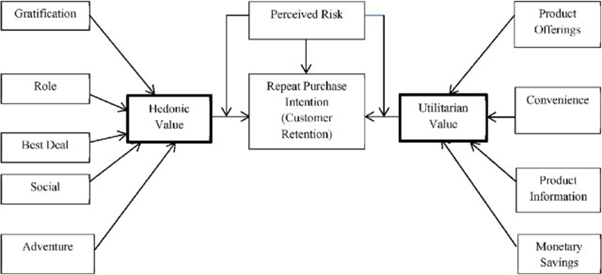

In [84]:
Platform

,Site_rating,Service_rating,Customer_rating,Used,Used(%),recommend,recommend(%),Perceived_Risk(%),highest_Shop_Rank(%),highest_Shop_Year_Rank(%),Probability_Cancel(%),Probability_Never_Cancel(%),Male%,Female%,Active_Time,Risks,No_of_Riks,Cancel_Reason
Amazon,4,4,3,269,100,219,81,35,92,74,20,22,100,100,5,frequent_UI_change,1,Better alternative offer
Flipkart,3,3,3,221,82,127,57,30,30,60,27,20,83,82,5,,0,Better alternative offer
Myntra,2,2,2,146,54,76,52,33,39,23,34,0,47,58,5,"slow_display_time, late_price_announcement, fr...",3,Better alternative offer
Paytm,2,1,2,150,56,44,29,44,33,19,50,0,68,50,3,"slow_login_time, slow_load_time, longer_delive...",3,Better alternative offer
Snapdeal,2,2,2,182,68,11,6,38,0,9,100,0,70,66,5,limited_payment_mode,1,Better alternative offer


In [85]:
Year_Wise

,Used_1,recommend_1,Used%_1,recommend%_1,Shop_Rank_1,Probability_Cancel_1,Risk(%)_1,Used_2,recommend_2,Used%_2,recommend%_2,Shop_Rank_2,Probability_Cancel_2,Risk(%)_2,Used_3,recommend_3,Used%_3,recommend%_3,Shop_Rank_3,Probability_Cancel_3,Risk(%)_3,Used_4,recommend_4,Used%_4,recommend%_4,Shop_Rank_4,Probability_Cancel_4,Risk(%)_4,Used_5,recommend_5,Used%_5,recommend%_5,Shop_Rank_5,Probability_Cancel_5,Risk(%)_5,Active_1,Active_2,Active_3,Active_4,Active_5
Amazon,43,33,100,77,100,26,26,16,10,100,62,100,13,42,65,63,100,97,100,20,43,47,40,100,85,100,18,35,98,73,100,74,84,22,31,5,5,5,3,5
Flipkart,39,26,91,67,0,30,31,11,7,69,64,0,43,70,50,20,77,40,55,35,15,37,15,79,41,0,24,33,84,59,86,70,42,44,33,5,1,5,5,5
Myntra,18,12,42,67,80,50,59,3,3,19,100,100,50,25,45,25,69,56,0,33,26,31,13,66,42,83,50,26,49,23,50,47,23,33,36,5,5,5,3,5
Paytm,24,6,56,25,80,50,58,4,1,25,25,0,100,41,26,7,40,27,0,100,57,33,11,70,33,58,50,36,63,19,64,30,26,50,37,4,5,3,3,3
Snapdeal,22,0,51,0,0,0,49,4,0,25,0,0,100,25,50,0,77,0,0,100,39,30,0,64,0,0,0,34,76,0,78,0,0,100,36,5,5,5,3,5


### Using Above to as lookup table we can start to deduce & analyse to test our understanding of retention and activation
### first start with Platform table analyses

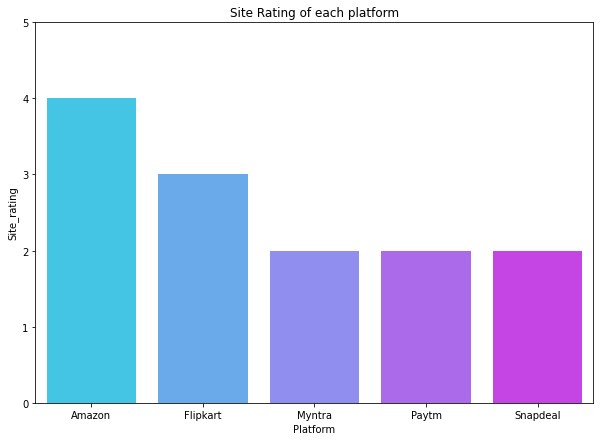

In [86]:
plt.figure(figsize= (10,7))
g=sn.barplot(Platform['Site_rating'].index,Platform['Site_rating'],palette = 'cool')
g.set_ylim(0,5)
plt.title('Site Rating of each platform')
plt.xlabel('Platform')
plt.show()

### Site Rating is an imp factor for customer activation and retention
### The higher the rating, the better the chances of retaining an existing user and grabbing the attention for new potential users
### Amazon with an outstanding rating 4/5
### Flipkart next in line having rating 3/5
### the chances of customer activation and retention is higher in these platforms.
### meanwhile the others have very lower chances of customer activation and higher chances of existing customers leaving based on the rating of their site.

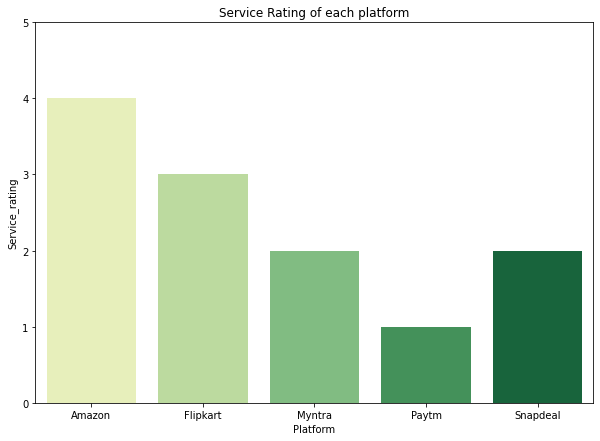

In [87]:
plt.figure(figsize= (10,7))
g=sn.barplot(Platform['Service_rating'].index,Platform['Service_rating'],palette = 'YlGn')
g.set_ylim(0,5)
plt.title('Service Rating of each platform')
plt.xlabel('Platform')
plt.show()

### service Rating is an imp factor for customer activation and retention
### The higher the rating, the better the chances of retaining an existing user and grabbing the attention for new potential users
### Amazon with an outstanding rating 4/5
### Flipkart next in line having rating 3/5
### the chances of customer activation and retention is higher in these platforms.
### meanwhile the others have very lower chances of customer activation and higher chances of existing customers leaving based on the rating of their service. In specific paytm is most likely to loose its existing customers

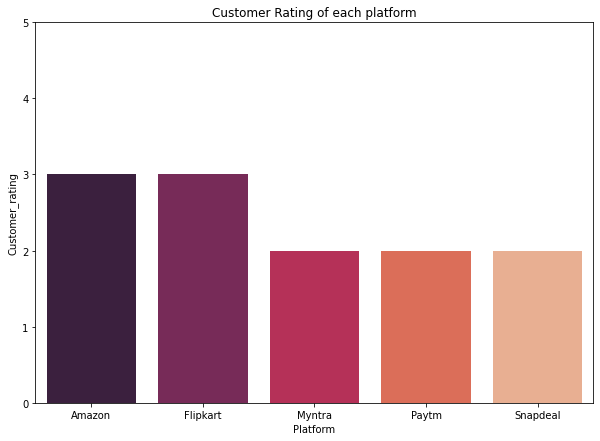

In [88]:
plt.figure(figsize= (10,7))
g=sn.barplot(Platform['Customer_rating'].index,Platform['Customer_rating'],palette = 'rocket')
g.set_ylim(0,5)
plt.title('Customer Rating of each platform')
plt.xlabel('Platform')
plt.show()

### Customer Rating is an imp factor for customer activation and retention
### it shows us how customer is ranking our platform, the higher the rating the more customers satisfied and retention and activation rate will see an increase in numbers
### The higher the rating, the better the chances of retaining an existing user and grabbing the attention for new potential users
### Amazon & Flipkart with a good rating 4/5
### the chances of customer activation and retention is higher in these platforms.
### meanwhile the others have very lower chances of customer activation and retention, higher chances of existing customers leaving based on the rating of their customers.

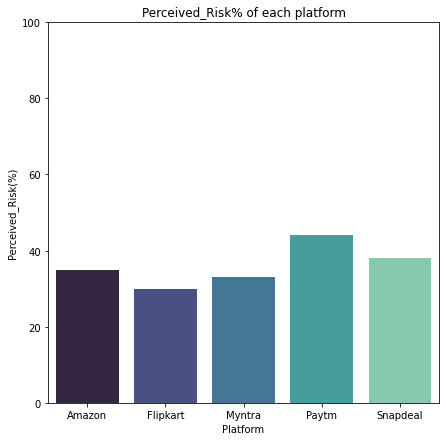

In [89]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Perceived_Risk(%)'].index,Platform['Perceived_Risk(%)'],palette = 'mako')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform')
plt.xlabel('Platform')
plt.show()

### Perceived_Risk% is an imp factor for customer activation and retention
### The higher the risk%, the lower the chances of retaining an existing user and grabbing the attention for new potential users.
### if the risk% is of very value platform can start loose existing customers
### Flipkart has the lowest risk% among all of the pllatforms.
### myntra being the second lowest and amazon third lowest.
### myntra and amazon have almose similar risk%
### the chances of customer activation and retention is higher in these platforms.
### meanwhile the others have very lower chances of customer activation and retention, higher chances of existing customers leaving based on the risk%.

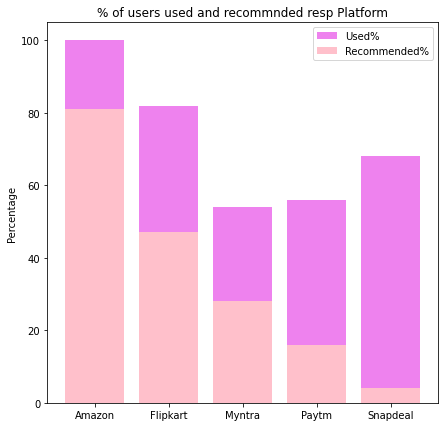

In [90]:
plt.figure(figsize= (7,7))
plt.bar(Platform['Used(%)'].index,Platform['Used(%)'],color='violet',label='Used%')
plt.bar(Platform['recommend(%)'].index,[81,47,28,16,4],color='pink',label='Recommended%')
plt.ylabel('Percentage')
plt.title('% of users used and recommnded resp Platform')
plt.legend()
plt.show()

### From above bar graph we can check the % of users used the specific platform.
### and out of total users, % of recommendation of these platforms.
### we can observe that amazon has highest used and recommnded customers
### Flipkart being next in line with high user% and recommendation%
### the chances of customer activation and retention is higher in these platforms.
### meanwhile the others have very lower chances of customer activation and retention, higher chances of existing customers leaving based on the recommended%.
### recommendation% is a sign of users interest in this platform, the higher, the more activation and retention

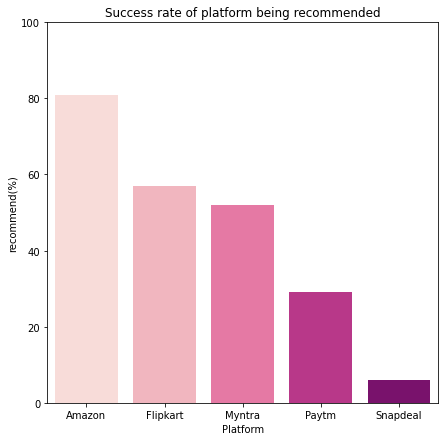

In [91]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['recommend(%)'].index,Platform['recommend(%)'],palette = 'RdPu')
g.set_ylim(0, 100)
plt.title('Success rate of platform being recommended')
plt.xlabel('Platform')
plt.show()

### Above bar graph is diff from the prev one.
### this abr graph gives out of users who used the platform, how many of them recommended, prev was for overall users.
### by getting the percentage of users recommended out of the users used we get the succes rate of each platform being recommended after usage.
### Success rate% is an imp factor for customer activation and retention
### The higher the Success rate%, the higher the chances of retaining an existing user and grabbing the attention for new potential users.
### Amazon, flipkart and myntra have more than 50% sucess rate and hence the chances of customer activation and retention is higher inthese platforms

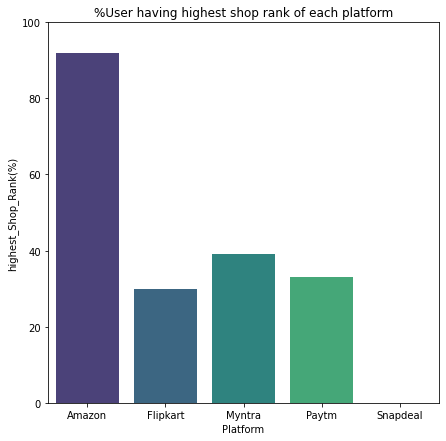

In [92]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['highest_Shop_Rank(%)'].index,Platform['highest_Shop_Rank(%)'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform')
plt.xlabel('Platform')
plt.show()

### out of the users which recommended this platform. what % of the users have highest shop rank.
### this shows the credibility of the user recommended
### this is an imp factor for customer activation and retention
### The higher the elite rank%, the higher the chances of retaining an existing user and grabbing the attention for new potential users.
### Amazon has an outstanding number of highest shop rank users, the chances for activation and retention of customer is very high.
### rest dont even have 50% of such grp in them

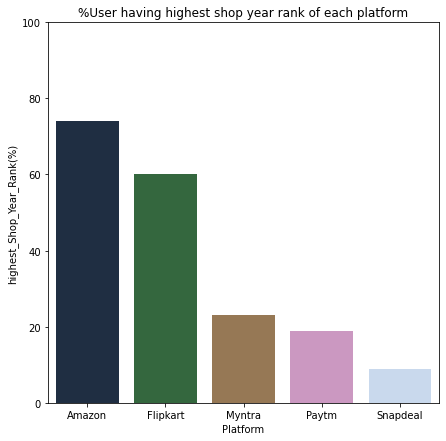

In [93]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['highest_Shop_Year_Rank(%)'].index,Platform['highest_Shop_Year_Rank(%)'],palette = 'cubehelix')
g.set_ylim(0, 100)
plt.title('%User having highest shop year rank of each platform')
plt.xlabel('Platform')
plt.show()

### out of the users which recommended this platform. what % of the users have highest shop year rank.
### this shows the credibility of the user recommended ,the higher the number the longer has the user used this platform and the recommended it.
### this is an imp factor for customer activation and retention
### The higher the elite rank%, the higher the chances of retaining an existing user and grabbing the attention for new potential users.
### Amazon & Flipkart has an outstanding number of highest shop year rank users, the chances for activation and retention of customer is very high.
### rest dont even have 50% of such grp in them

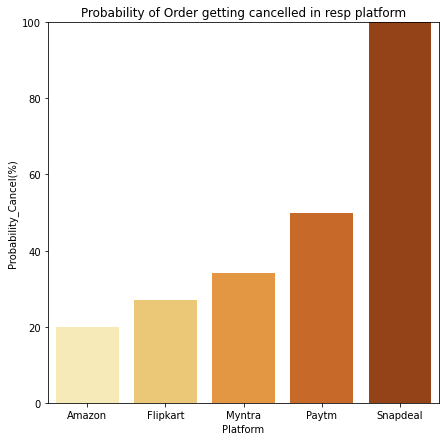

In [94]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Probability_Cancel(%)'].index,Platform['Probability_Cancel(%)'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform')
plt.xlabel('Platform')
plt.show()

### Cancel rate% is an imp factor for customer retention
### The higher the Cancel rate%, the lower the chances of retaining an existing user. the increasing number also shows us the decreasing interest of a customer to buy from this platform.
### Amazon has the lowest cancel rate, then flipkart and myntra, rest all have more than 50% cancel rate and hence the chances of customer retention is lowest in these platforms
### the lower the cancel rate the better

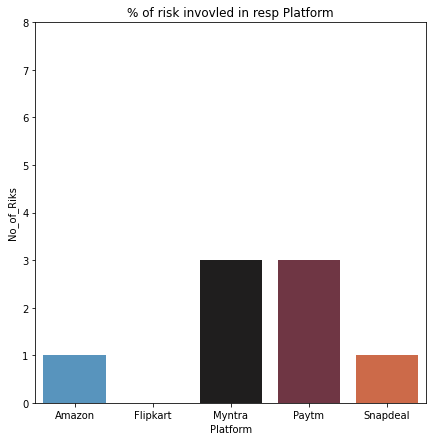

In [95]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['No_of_Riks'].index,Platform['No_of_Riks'],palette = 'icefire')
g.set_ylim(0,8)
plt.title('% of risk invovled in resp Platform')
plt.xlabel('Platform')
plt.show()

### This graph gives us the number of drawabacks a platform has. 
### the more the drawbacks the lower the chaces of activation and retention of the customer.
### Flipkart being the one with no drawbacks and then amazon and snapdeal with one drawback

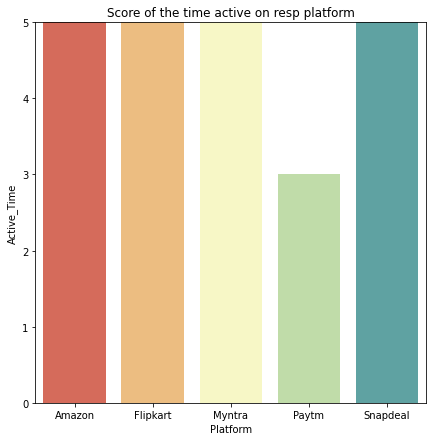

In [96]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Active_Time'].index,Platform['Active_Time'],palette = 'Spectral')
g.set_ylim(0,5)
plt.title('Score of the time active on resp platform')
plt.xlabel('Platform')
plt.show()

### This graph gives us the time spent by a customer on the platform. 
### the higher the number, the more the interest of a user to shop online from specified platform.
### except for paytm rest all have users spending most time for online shopping.

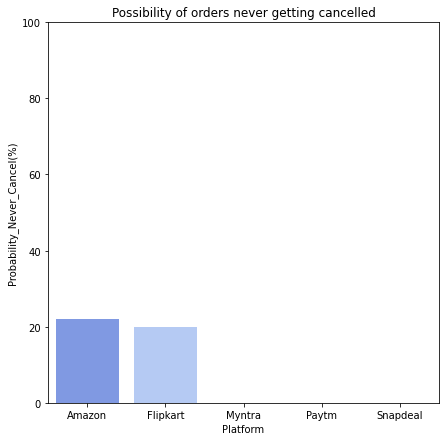

In [97]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Probability_Never_Cancel(%)'].index,Platform['Probability_Never_Cancel(%)'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('Possibility of orders never getting cancelled')
plt.xlabel('Platform')
plt.show()

### Never Cancel rate% is an imp factor for customer retention
### The higher the Never Cancel rate%, the higher the chances of retaining an existing user.
### Amazon & Flipkart are the only platform where there are fair chances the order might nevr get cancelled
### the higher the never cancel rate the better

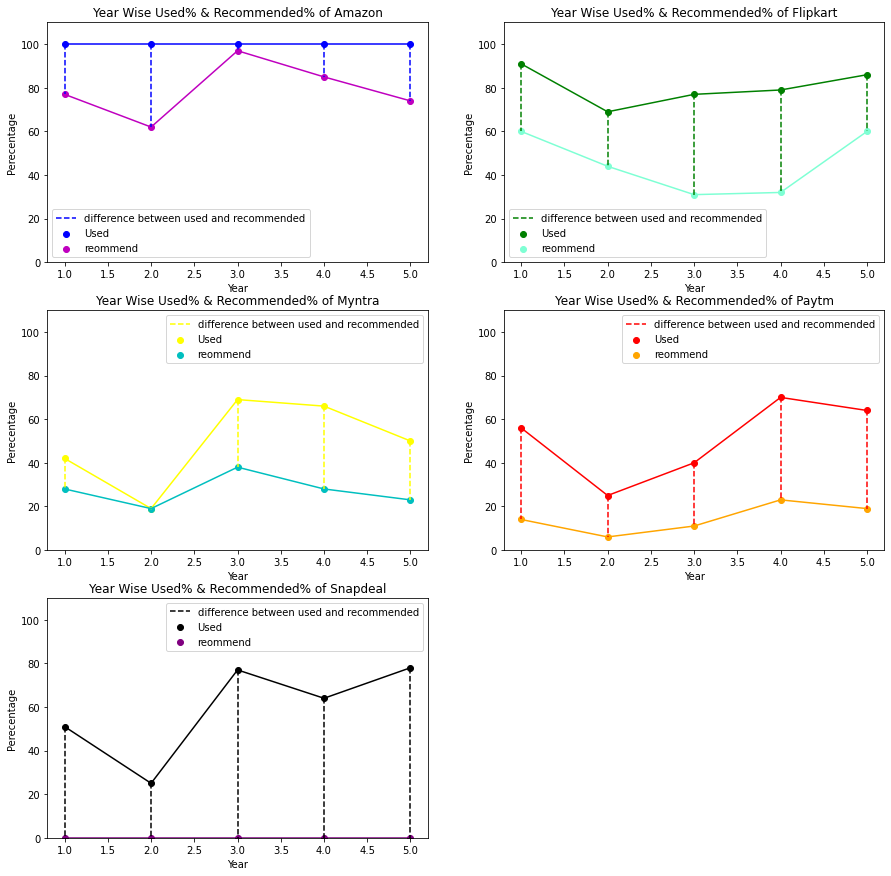

In [98]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
plt.scatter(1,Year_Wise['Used%_1']['Amazon'],color='blue',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Amazon'],color='blue')
plt.scatter(3,Year_Wise['Used%_3']['Amazon'],color='blue')
plt.scatter(4,Year_Wise['Used%_4']['Amazon'],color='blue')
plt.scatter(5,Year_Wise['Used%_5']['Amazon'],color='blue')
plt.plot([1,2],[Year_Wise['Used%_1']['Amazon'],Year_Wise['Used%_2']['Amazon']],color='blue')
plt.plot([2,3],[Year_Wise['Used%_2']['Amazon'],Year_Wise['Used%_3']['Amazon']],color='blue')
plt.plot([3,4],[Year_Wise['Used%_3']['Amazon'],Year_Wise['Used%_4']['Amazon']],color='blue')
plt.plot([4,5],[Year_Wise['Used%_4']['Amazon'],Year_Wise['Used%_5']['Amazon']],color='blue')
plt.scatter(1,Year_Wise['recommend%_1']['Amazon'],color='m',label='reommend')
plt.scatter(2,Year_Wise['recommend%_2']['Amazon'],color='m')
plt.scatter(3,Year_Wise['recommend%_3']['Amazon'],color='m')
plt.scatter(4,Year_Wise['recommend%_4']['Amazon'],color='m')
plt.scatter(5,Year_Wise['recommend%_5']['Amazon'],color='m')
plt.plot([1,2],[Year_Wise['recommend%_1']['Amazon'],Year_Wise['recommend%_2']['Amazon']],color='m')
plt.plot([2,3],[Year_Wise['recommend%_2']['Amazon'],Year_Wise['recommend%_3']['Amazon']],color='m')
plt.plot([3,4],[Year_Wise['recommend%_3']['Amazon'],Year_Wise['recommend%_4']['Amazon']],color='m')
plt.plot([4,5],[Year_Wise['recommend%_4']['Amazon'],Year_Wise['recommend%_5']['Amazon']],color='m')
plt.plot([1,1],[Year_Wise['Used%_1']['Amazon'],Year_Wise['recommend%_1']['Amazon']],'--',color='blue',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Amazon'],Year_Wise['recommend%_2']['Amazon']],'--',color='blue')
plt.plot([3,3],[Year_Wise['Used%_3']['Amazon'],Year_Wise['recommend%_3']['Amazon']],'--',color='blue')
plt.plot([4,4],[Year_Wise['Used%_4']['Amazon'],Year_Wise['recommend%_4']['Amazon']],'--',color='blue')
plt.plot([5,5],[Year_Wise['Used%_5']['Amazon'],Year_Wise['recommend%_5']['Amazon']],'--',color='blue')
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Amazon')
plt.legend()
plt.ylim(0,110)
plt.subplot(3,2,2)

plt.scatter(1,Year_Wise['Used%_1']['Flipkart'],color='green',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Flipkart'],color='green')
plt.scatter(3,Year_Wise['Used%_3']['Flipkart'],color='green')
plt.scatter(4,Year_Wise['Used%_4']['Flipkart'],color='green')
plt.scatter(5,Year_Wise['Used%_5']['Flipkart'],color='green')
plt.plot([1,2],[Year_Wise['Used%_1']['Flipkart'],Year_Wise['Used%_2']['Flipkart']],color='green')
plt.plot([2,3],[Year_Wise['Used%_2']['Flipkart'],Year_Wise['Used%_3']['Flipkart']],color='green')
plt.plot([3,4],[Year_Wise['Used%_3']['Flipkart'],Year_Wise['Used%_4']['Flipkart']],color='green')
plt.plot([4,5],[Year_Wise['Used%_4']['Flipkart'],Year_Wise['Used%_5']['Flipkart']],color='green')
plt.scatter(1,round((Year_Wise['recommend_1']['Flipkart']*100)/Year_Wise['Used_1']['Amazon']),color='aquamarine',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon']),color='aquamarine')
plt.scatter(3,round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon']),color='aquamarine')
plt.scatter(4,round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon']),color='aquamarine')
plt.scatter(5,round((Year_Wise['recommend_5']['Flipkart']*100)/Year_Wise['Used_5']['Amazon']),color='aquamarine')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Flipkart']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon'])],color='aquamarine')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon'])],color='aquamarine')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon'])],color='aquamarine')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Flipkart']*100)/Year_Wise['Used_5']['Amazon'])],color='aquamarine')
plt.plot([1,1],[Year_Wise['Used%_1']['Flipkart'],
               round((Year_Wise['recommend_1']['Flipkart']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='green',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Flipkart'],
               round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='green')
plt.plot([3,3],[Year_Wise['Used%_3']['Flipkart'],
               round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='green')
plt.plot([4,4],[Year_Wise['Used%_4']['Flipkart'],
               round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='green')
plt.plot([5,5],[Year_Wise['Used%_5']['Flipkart'],
               round((Year_Wise['recommend_5']['Flipkart']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='green')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Flipkart')
plt.legend()
plt.subplot(3,2,3)

plt.scatter(1,Year_Wise['Used%_1']['Myntra'],color='yellow',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Myntra'],color='yellow')
plt.scatter(3,Year_Wise['Used%_3']['Myntra'],color='yellow')
plt.scatter(4,Year_Wise['Used%_4']['Myntra'],color='yellow')
plt.scatter(5,Year_Wise['Used%_5']['Myntra'],color='yellow')
plt.plot([1,2],[Year_Wise['Used%_1']['Myntra'],Year_Wise['Used%_2']['Myntra']],color='yellow')
plt.plot([2,3],[Year_Wise['Used%_2']['Myntra'],Year_Wise['Used%_3']['Myntra']],color='yellow')
plt.plot([3,4],[Year_Wise['Used%_3']['Myntra'],Year_Wise['Used%_4']['Myntra']],color='yellow')
plt.plot([4,5],[Year_Wise['Used%_4']['Myntra'],Year_Wise['Used%_5']['Myntra']],color='yellow')
plt.scatter(1,round((Year_Wise['recommend_1']['Myntra']*100)/Year_Wise['Used_1']['Amazon']),color='c',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon']),color='c')
plt.scatter(3,round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon']),color='c')
plt.scatter(4,round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon']),color='c')
plt.scatter(5,round((Year_Wise['recommend_5']['Myntra']*100)/Year_Wise['Used_5']['Amazon']),color='c')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Myntra']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon'])],color='c')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon'])],color='c')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon'])],color='c')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Myntra']*100)/Year_Wise['Used_5']['Amazon'])],color='c')
plt.plot([1,1],[Year_Wise['Used%_1']['Myntra'],
               round((Year_Wise['recommend_1']['Myntra']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='yellow',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Myntra'],
               round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='yellow')
plt.plot([3,3],[Year_Wise['Used%_3']['Myntra'],
               round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='yellow')
plt.plot([4,4],[Year_Wise['Used%_4']['Myntra'],
               round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='yellow')
plt.plot([5,5],[Year_Wise['Used%_5']['Myntra'],
               round((Year_Wise['recommend_5']['Myntra']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='yellow')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Myntra')
plt.legend()
plt.subplot(3,2,4)

plt.scatter(1,Year_Wise['Used%_1']['Paytm'],color='red',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Paytm'],color='red')
plt.scatter(3,Year_Wise['Used%_3']['Paytm'],color='red')
plt.scatter(4,Year_Wise['Used%_4']['Paytm'],color='red')
plt.scatter(5,Year_Wise['Used%_5']['Paytm'],color='red')
plt.plot([1,2],[Year_Wise['Used%_1']['Paytm'],Year_Wise['Used%_2']['Paytm']],color='red')
plt.plot([2,3],[Year_Wise['Used%_2']['Paytm'],Year_Wise['Used%_3']['Paytm']],color='red')
plt.plot([3,4],[Year_Wise['Used%_3']['Paytm'],Year_Wise['Used%_4']['Paytm']],color='red')
plt.plot([4,5],[Year_Wise['Used%_4']['Paytm'],Year_Wise['Used%_5']['Paytm']],color='red')
plt.scatter(1,round((Year_Wise['recommend_1']['Paytm']*100)/Year_Wise['Used_1']['Amazon']),color='orange',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon']),color='orange')
plt.scatter(3,round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon']),color='orange')
plt.scatter(4,round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon']),color='orange')
plt.scatter(5,round((Year_Wise['recommend_5']['Paytm']*100)/Year_Wise['Used_5']['Amazon']),color='orange')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Paytm']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon'])],color='orange')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon'])],color='orange')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon'])],color='orange')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Paytm']*100)/Year_Wise['Used_5']['Amazon'])],color='orange')
plt.plot([1,1],[Year_Wise['Used%_1']['Paytm'],
               round((Year_Wise['recommend_1']['Paytm']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='red',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Paytm'],
               round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='red')
plt.plot([3,3],[Year_Wise['Used%_3']['Paytm'],
               round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='red')
plt.plot([4,4],[Year_Wise['Used%_4']['Paytm'],
               round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='red')
plt.plot([5,5],[Year_Wise['Used%_5']['Paytm'],
               round((Year_Wise['recommend_5']['Paytm']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='red')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Paytm')
plt.legend()
plt.subplot(3,2,5)

plt.scatter(1,Year_Wise['Used%_1']['Snapdeal'],color='black',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Snapdeal'],color='black')
plt.scatter(3,Year_Wise['Used%_3']['Snapdeal'],color='black')
plt.scatter(4,Year_Wise['Used%_4']['Snapdeal'],color='black')
plt.scatter(5,Year_Wise['Used%_5']['Snapdeal'],color='black')
plt.plot([1,2],[Year_Wise['Used%_1']['Snapdeal'],Year_Wise['Used%_2']['Snapdeal']],color='black')
plt.plot([2,3],[Year_Wise['Used%_2']['Snapdeal'],Year_Wise['Used%_3']['Snapdeal']],color='black')
plt.plot([3,4],[Year_Wise['Used%_3']['Snapdeal'],Year_Wise['Used%_4']['Snapdeal']],color='black')
plt.plot([4,5],[Year_Wise['Used%_4']['Snapdeal'],Year_Wise['Used%_5']['Snapdeal']],color='black')
plt.scatter(1,round((Year_Wise['recommend_1']['Snapdeal']*100)/Year_Wise['Used_1']['Amazon']),color='purple',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon']),color='purple')
plt.scatter(3,round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon']),color='purple')
plt.scatter(4,round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon']),color='purple')
plt.scatter(5,round((Year_Wise['recommend_5']['Snapdeal']*100)/Year_Wise['Used_5']['Amazon']),color='purple')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Snapdeal']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon'])],color='purple')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon'])],color='purple')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon'])],color='purple')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Snapdeal']*100)/Year_Wise['Used_5']['Amazon'])],color='purple')
plt.plot([1,1],[Year_Wise['Used%_1']['Snapdeal'],
               round((Year_Wise['recommend_1']['Snapdeal']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='black',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Snapdeal'],
               round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='black')
plt.plot([3,3],[Year_Wise['Used%_3']['Snapdeal'],
               round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='black')
plt.plot([4,4],[Year_Wise['Used%_4']['Snapdeal'],
               round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='black')
plt.plot([5,5],[Year_Wise['Used%_5']['Snapdeal'],
               round((Year_Wise['recommend_5']['Snapdeal']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='black')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Snapdeal')
plt.legend()
plt.show()

### Year Wise Used% & Recommended% of every platform.
### From above graph we can check the % of users used the specific platform for every year rank.
### we can deduce that as years progress how well is the customer retention and activation
### from above we can deduce that the users recommnded for amazon is higher than the used% of users
### hence the user activation of amazon is higher than any other platform.
### in this manner we can deduce users activation and retention of every platform yearwise. 
### to check retention we shall check the used and recommnded % of every platform of year rank1 and year rank 5

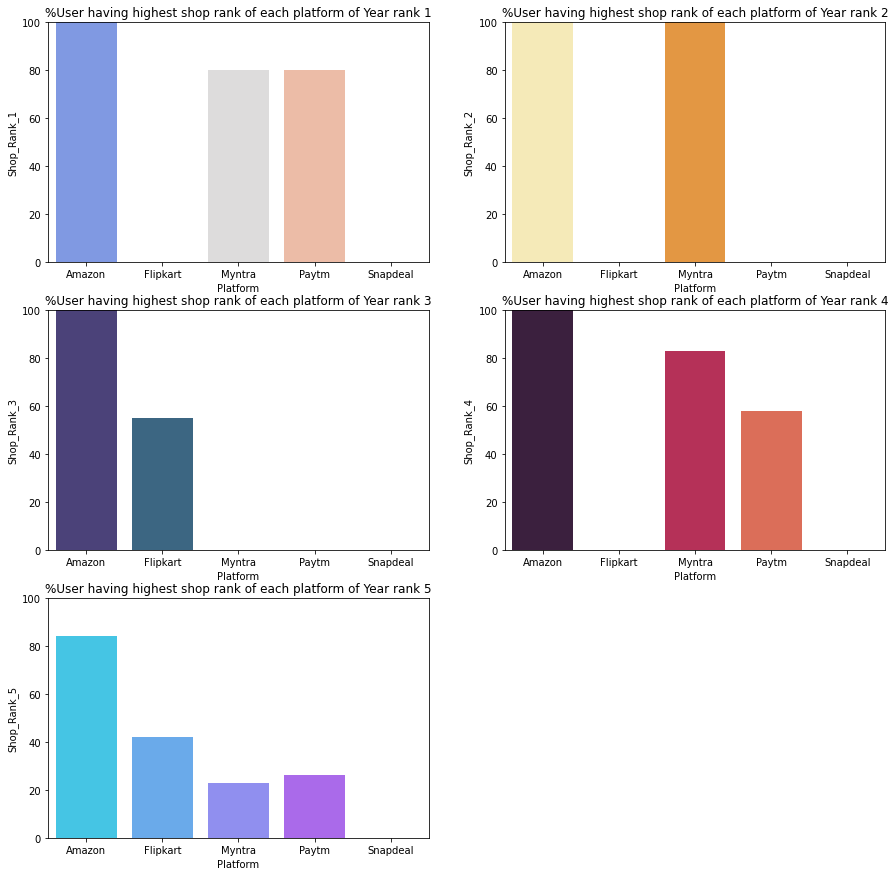

In [99]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_1'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,2)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_2'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 2')
plt.xlabel('Platform')
plt.subplot(3,2,3)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_3'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 3')
plt.xlabel('Platform')
plt.subplot(3,2,4)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_4'],palette = 'rocket')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 4')
plt.xlabel('Platform')
plt.subplot(3,2,5)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_5'],palette = 'cool')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 5')
plt.xlabel('Platform')
plt.show()

# if platform value is blank that means during that year that platform was not used
###  Year Wise % of User having highest shop rank of each platform
### out of the users which recommended this platform. what % of the users have highest shop year rank.
### this shows the credibility of the user recommended
### this is an imp factor for customer activation and retention
### The higher the elite rank%, the higher the chances of retaining an existing user and grabbing the attention for new potential users.
### Amazon has an outstanding number of highest shop year rank users, the chances for activation and retention of customer is very high in every year.
### apart from amazon:
### year rank 1 has myntra and paytm recommended more than 50%.
### year rank 2 both amazon and myntra have all the users with highest year rank.
### year rank 3 flipkart with more than 50%
### year rank 4 all platforms cross 50% mark
### year rank 5 only amazon is able to cross 50% mark
### meaning as the years goes on amazon will be the platform with most activation and retention.
### rest dont even have 50% of such grp in them

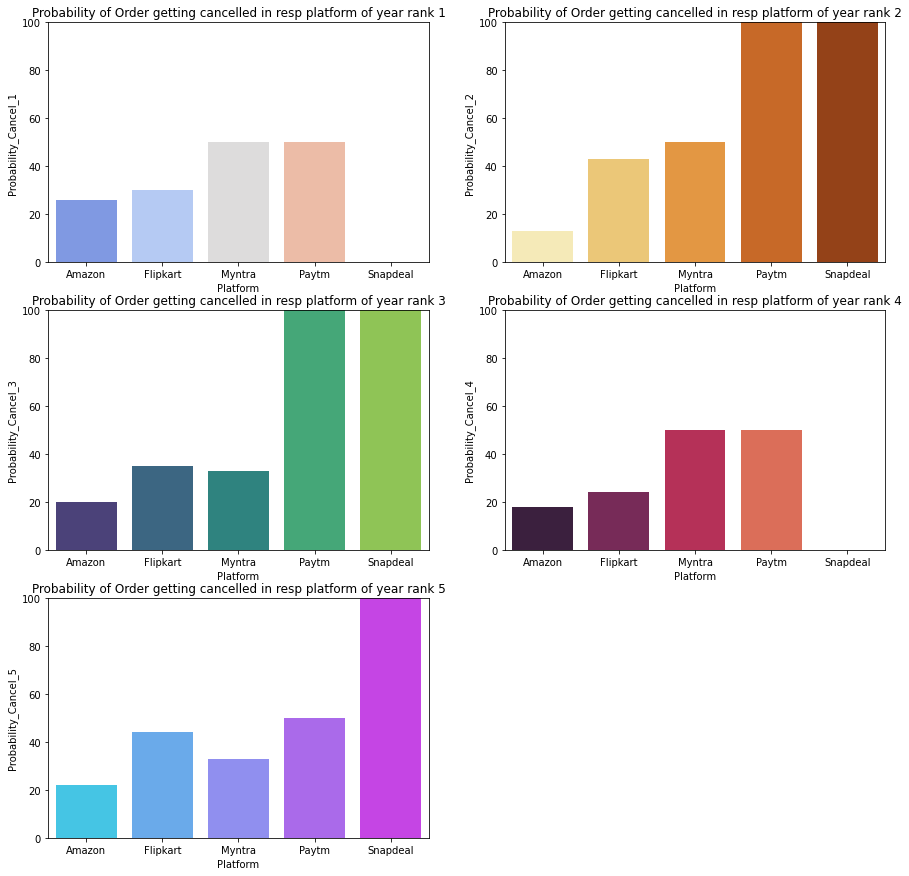

In [100]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_1'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,2)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_2'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 2')
plt.xlabel('Platform')
plt.subplot(3,2,3)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_3'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 3')
plt.xlabel('Platform')
plt.subplot(3,2,4)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_4'],palette = 'rocket')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 4')
plt.xlabel('Platform')
plt.subplot(3,2,5)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_5'],palette = 'cool')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 5')
plt.xlabel('Platform')
plt.show()

### if platform value is blank that means during that year that platform was not used
### graph shows the Year Wise possibility of User cancelling the order 
### every year we can see that amazon has the lowest cancel ratio, then there is flipkart and myntra
### paytm and snapdeal have too much of cancel probability
### the lower the rate of cancellation the bhigher the retention of a platform

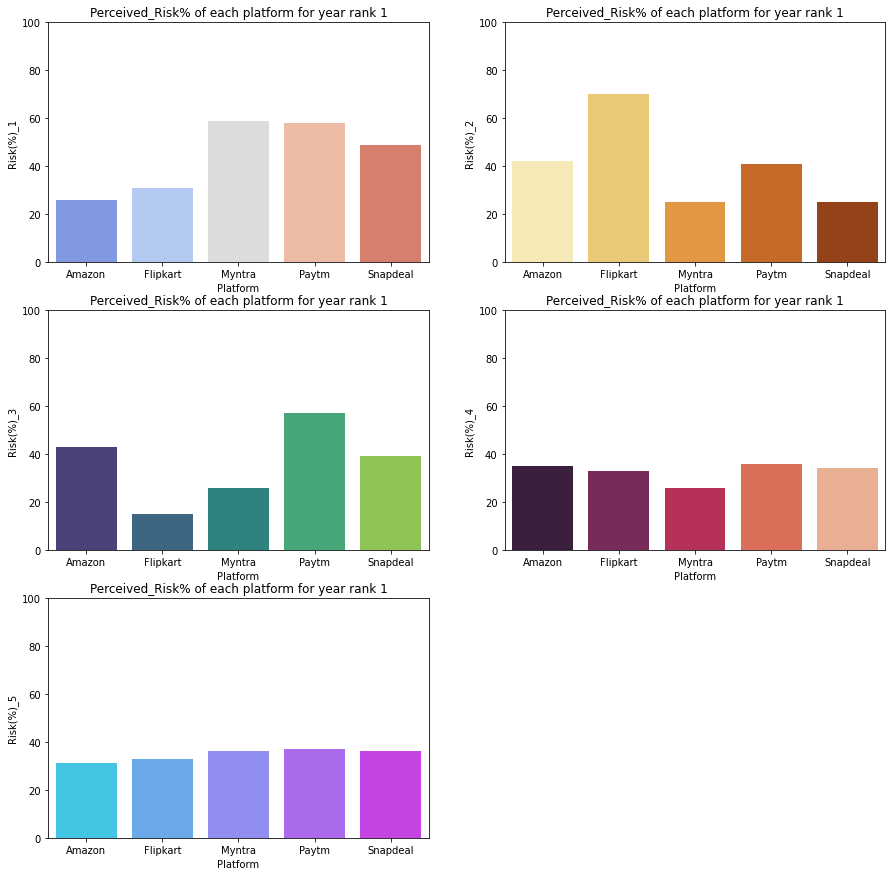

In [101]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
g=sn.barplot(Year_Wise['Risk(%)_1'].index,Year_Wise['Risk(%)_1'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,2)
g=sn.barplot(Year_Wise['Risk(%)_1'].index,Year_Wise['Risk(%)_2'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,3)
g=sn.barplot(Year_Wise['Risk(%)_3'].index,Year_Wise['Risk(%)_3'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,4)
g=sn.barplot(Year_Wise['Risk(%)_4'].index,Year_Wise['Risk(%)_4'],palette = 'rocket')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,5)
g=sn.barplot(Year_Wise['Risk(%)_1'].index,Year_Wise['Risk(%)_5'],palette = 'cool')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.show()

### graph shows the Year Wise %risk involved for individual platform the order
### year rank 1: amazon and flipkart have less than 40% risk
### year rank 2: myntra and snapdeal have less than 40% risk
### year rank 3; myntra and flipkart have less than 40% risk
### year rank 4: all platforms have less than 40% risk
### year rank 5: all platforms have less than 40% risk
### from above we can deduce that myntra & flipkart are the ones with lowest percentage of risk
### the lower the rate of risk the bigger the retention & activation of users of a platform

### If a user has used all platforms what are his recommendations, his shopping rank (no of items bought in a year), cancel habbit

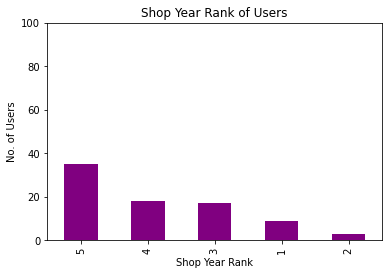

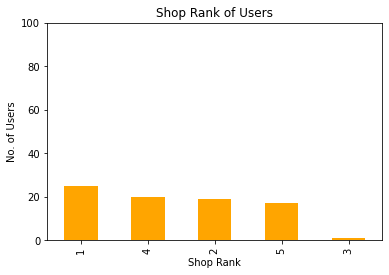

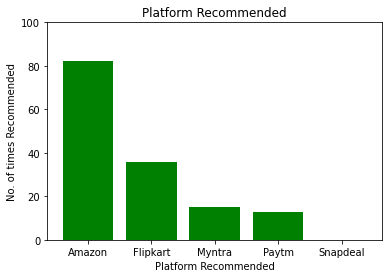

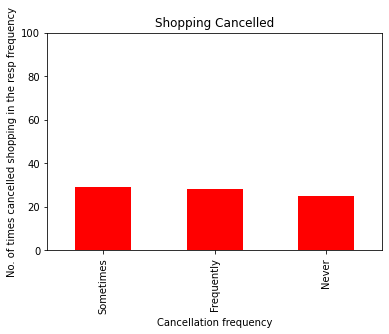

In [102]:
data[data['Number_of_platform_Used']==5]['shop_year_rank'].value_counts().plot(kind='bar',color='purple')
plt.title('Shop Year Rank of Users')
plt.xlabel('Shop Year Rank')
plt.ylabel('No. of Users')
plt.ylim(0,100)
plt.show()

data[data['Number_of_platform_Used']==5]['shop_rank'].value_counts().plot(kind='bar',color='orange')
plt.title('Shop Rank of Users')
plt.xlabel('Shop Rank')
plt.ylabel('No. of Users')
plt.ylim(0,100)
plt.show()

amazon=0
flipkart=0
myntra=0
snapdeal=0
paytm=0
for i in list(data[data['Number_of_platform_Used']==5].index):
    for j in data[data['Number_of_platform_Used']==5]['platform_recommend'][i].split(','):
        platform=j.split('.')[0].lower().strip()
        if platform=='amazon':
            amazon+=1
        elif platform=='flipkart':
            flipkart+=1
        elif platform=='myntra':
            myntra+=1
        elif platform=='paytm':
            paytm+=1
        elif platform=='snapdeal':
            snapdeal+=1
plt.bar(['Amazon','Flipkart','Myntra','Paytm','Snapdeal'],[amazon,flipkart,myntra,paytm,snapdeal],color='green')            
plt.title('Platform Recommended')
plt.xlabel('Platform Recommended')
plt.ylabel('No. of times Recommended')
plt.ylim(0,100)
plt.show()
data[data['Number_of_platform_Used']==5]['cancel_shopping'].value_counts().plot(kind='bar',color='red')
plt.title('Shopping Cancelled')
plt.xlabel('Cancellation frequency')
plt.ylabel('No. of times cancelled shopping in the resp frequency')
plt.ylim(0,100)
plt.show()

### (Retention & Activation)
### From above we can see that when user has used all the platform he is never recommending Snapdeal.
### Amazon & flipkart are most recommended.
### shop rank increases along with shop year rank
### hence good retention is obtained
### Shop rank is less but is so is the cancellation frequency

### Conclusion

### Amazon and Flipkart are most used and recommended platforms.
### These platforms have higher rating in every terms.
### These platforms have lower risk%, lesser drawbacks and less cancellation chances of an order.
### These platforms have high percentage of elite group with good credibility using and recommending the platform.
### Out of these 2, Amazon is the one which has higher chances of customer activation and recommendation.
### Rest all platforms should be improved or their existing users are going their platforms.
